## Méthodes

In [1]:
# pour filtrer les colonnes en fonction de leur taux de valeurs manquantes
def filter_col_by_mising_data_pct(df, pct_min=0, pct_max=100):
    result = pd.DataFrame()
    print("Le DataFrame à filtrer présente", len(df), "lignes et", len(df.columns), "colonnes.")
    
    # test sur dataset en input
    if len(df) == 0:
        print("Le DataFrame d'origine est vide.")
        return result
    
    print("La méthode va renvoyer un DataFrame présentant uniquement les colonnes ayant une part de valeurs manquantes allant de", pct_min, "% inclu à", pct_max, "% exclu.")
    # extraction des colonnes remplissant la condition de filtrage
    tot_list_col = round(df.isnull().mean()*100, 4).sort_values(ascending=False)
    tot_list_col = pd.DataFrame(tot_list_col, columns = ["%"])
    remain_list_col = tot_list_col.loc[(tot_list_col["%"] >= pct_min) & (tot_list_col["%"] < pct_max), :]
    nb_col_remained = len(remain_list_col)
    nb_col_removed = len(tot_list_col) - nb_col_remained
    print("Après filtrage, il reste", nb_col_remained, "colonnes dans le DataFrame.")
    print("Il y a eu suppression de", nb_col_removed, "colonnes, soit", round(nb_col_removed/len(tot_list_col)*100, 2), "% des colonnes.")
    
    # test sur le nb de colonnes restantes
    if len(remain_list_col) == 0:
        print("Le filtre est trop bas. Il n'y a plus de colonnes à exploiter.")
        return result
    
    # renvoyer le même dataset avec uniquement les colonnes filtrées
    result = df[remain_list_col.index]
    return result

In [2]:
# pour supprimer les colonnes vides en passant par la méthode de filtre en fonction du taux de valeurs manquantes
def remove_empty_columns(df):
    result = pd.DataFrame()
    
    # test sur dataset en input
    if len(df) == 0:
        print("Le DataFrame d'origine est vide.")
        return result
    
    print("Appel de la méthode filter_col_by_mising_data_pct() pour supprimer les colonnes vides.")
    result = filter_col_by_mising_data_pct(df)
    return result    

In [3]:
# pour séparer les colonnes par type de donnée
def split_data_num_categ(df):
    result = []
    
    # test sur dataset en input
    if len(df) == 0:
        print("Le DataFrame d'origine est vide.")
        return result
    
    dict_col = {
        'numeric': [],
        'category': [],
        'boolean': [],
        'datetime': [],
        'deltatime': []
    }
    
    for col in df.columns:
        if df[col].dtype.name in ('float64', 'int64'):
            dict_col['numeric'].append(col)
        elif df[col].dtype.name in ('object', 'category'):
            dict_col['category'].append(col)
        elif df[col].dtype.name == 'bool':
            dict_col['boolean'].append(col)
        elif df[col].dtype.name == 'datetime64':
            dict_col['datetime'].append(col)
        elif df[col].dtype.name == 'timedelta[ns]':
            dict_col['deltatime'].append(col)
        else:
            print("Type de données non connu :", df[col].dtype.name, "pour la colonne", col)

    print("Voici la répartition des colonnes par type de données :")
    for key, value in dict_col.items():
        nb_col_by_type = len(value)
        print(key, ":", nb_col_by_type, "colonnes.")
        if nb_col_by_type > 0:
            result.append(df[value])
    
    return result

In [4]:
# pour les pie charts, pour afficher les pourcentages et les libellés uniquement avec le taux > limit_perc%
limit_perc = 5
def show_perc(pct):
    return ('%.1f%%' % pct) if pct > limit_perc else ''

def show_labels(data):
    list = []
    for val, cnt in data.items():
        if (cnt*100/np.sum(data)) > limit_perc :
            list.append(val)
        else:
            list.append('')
    return list

In [5]:
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    [fpr_tr, tpr_tr, thr_tr] = metrics.roc_curve(y_train, y_train_pred)
    plt.plot(fpr_tr, tpr_tr, color='blue', lw=2, label="TrainingSet")    
    [fpr_te, tpr_te, thr_te] = metrics.roc_curve(y_test, y_test_pred)
    plt.plot(fpr_te, tpr_te, color='coral', lw=2, label="TestingSet")
    
    # indice du premier seuil pour lequel
    # la sensibilité est supérieure à 0.95
#     idx = np.min(np.where(tpr_te > 0.95)) 

#     print("Sensibilité : {:.2f}".format(tpr_te[idx]))
#     print("Spécificité : {:.2f}".format(1-fpr_te[idx]))
#     print("Seuil : {:.2f}".format(thr_te[idx]))
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - Specificity', fontsize=14)
    plt.ylabel('Sensitivity', fontsize=14)
    plt.title("ROC")
    plt.legend()

In [6]:
def classification_metrics(model, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred, list_metrics=["accuracy"], all_metrics=False, roc_curve=False):
    if all_metrics:
        list_metrics = ["accuracy", "recall", "precision", "auc", "f1"]
    for met in list_metrics:
        # if met == "score":
            # print("Score :")
            # tr_res = (model.score(X_train, y_train)*100).round(2)
            # te_res = (model.score(X_test, y_test)*100).round(2)
            # print("TrainingSet :", tr_res, "%")
            # print("TestingSet :", te_res, "%")
        if met == "accuracy":            
            print("Accuracy :")
            tr_res = (metrics.accuracy_score(y_train, y_train_pred)*100).round(2)
            te_res = (metrics.accuracy_score(y_test, y_test_pred)*100).round(2)
            print("TrainingSet :", tr_res, "%")
            print("TestingSet :", te_res, "%")
        elif met == "precision":            
            print("Précision :")
            tr_res = (metrics.precision_score(y_train, y_train_pred)*100).round(2)
            te_res = (metrics.precision_score(y_test, y_test_pred)*100).round(2)
            print("TrainingSet :", tr_res, "%")
            print("TestingSet :", te_res, "%")
        elif met == "recall":            
            print("Rappel (Recall/Sensitivity) :")
            tr_res = (metrics.recall_score(y_train, y_train_pred)*100).round(2)
            te_res = (metrics.recall_score(y_test, y_test_pred)*100).round(2)
            print("TrainingSet :", tr_res, "%")
            print("TestingSet :", te_res, "%")
        elif met == "auc":            
            print("AUC :")
            tr_res = metrics.roc_auc_score(y_train, y_train_pred).round(3)
            te_res = metrics.roc_auc_score(y_test, y_test_pred).round(3)
            print("TrainingSet :", tr_res)
            print("TestingSet :", te_res)
            if roc_curve:
                plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred)
        elif met == "f1":            
            print("F1-score :")
            tr_res = (metrics.f1_score(y_train, y_train_pred)*100).round(2)
            te_res = (metrics.f1_score(y_test, y_test_pred)*100).round(2)
            print("TrainingSet :", tr_res, "%")
            print("TestingSet :", te_res, "%")
        elif met == "fbeta":
            print("Fbeta-score :")
            tr_res = (metrics.fbeta_score(y_train, y_train_pred, beta=2)*100).round(2)
            te_res = (metrics.fbeta_score(y_test, y_test_pred, beta=2)*100).round(2)
            print("TrainingSet :", tr_res, "%")
            print("TestingSet :", te_res, "%")
            
        print("---------------------------------------")

## Imports

In [7]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics, neighbors, dummy, linear_model, impute, svm, ensemble
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Data

In [8]:
raw_data = pd.read_csv('input/application_train.csv')
print('Data shape: ', raw_data.shape)
raw_data.head()

Data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Explore Data

### Target Column

In [9]:
temp_val_count = raw_data['TARGET'].value_counts(normalize=True)

<AxesSubplot: ylabel='Target'>

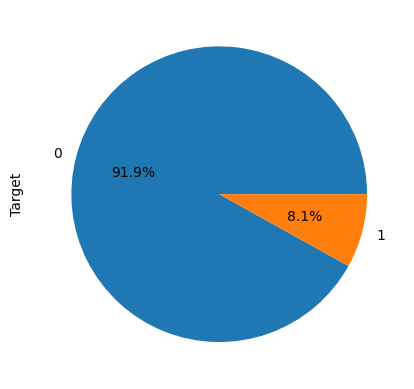

In [10]:
temp_val_count.plot(kind="pie", autopct=show_perc, labels=show_labels(temp_val_count), label='Target')

Répartition hétérogène, à voir pour utiliser XGBoost.

### Colonnes vides ?

In [11]:
data_wo_empty_col = remove_empty_columns(raw_data)

Appel de la méthode filter_col_by_mising_data_pct() pour supprimer les colonnes vides.
Le DataFrame à filtrer présente 307511 lignes et 122 colonnes.
La méthode va renvoyer un DataFrame présentant uniquement les colonnes ayant une part de valeurs manquantes allant de 0 % inclu à 100 % exclu.
Après filtrage, il reste 122 colonnes dans le DataFrame.
Il y a eu suppression de 0 colonnes, soit 0.0 % des colonnes.


## Types de colonne

In [12]:
data_num, data_categ = split_data_num_categ(raw_data)

Voici la répartition des colonnes par type de données :
numeric : 106 colonnes.
category : 16 colonnes.
boolean : 0 colonnes.
datetime : 0 colonnes.
deltatime : 0 colonnes.


In [13]:
data_categ.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [14]:
# Number of unique classes in each object column
raw_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Label Encoding and One-Hot Encoding

Pour les labels ayant 2 valeurs possibles, on fera un Label Encoding. Pour les autres, on utilisera le One-Hot Encoding.

In [15]:
def compute_encoding(df, df2=False):
    result = []
    
    # test sur dataset en input
    if len(df) == 0:
        print("Le DataFrame d'origine est vide.")
        return result
    
    nb_col_orig = len(df.columns)
    print("Le DataFrame à encoder présente", len(df), "lignes et", nb_col_orig, "colonnes.")
    nb_label = 0
    nb_one_hot = 0
    
    # Label Encoder
    label_encoder = LabelEncoder()
    for col in df:
        if df[col].dtype == 'object' and len(list(df[col].unique())) <= 2:
            print("La colonne", col, "est label encodée")
            label_encoder.fit(df[col])
            df[col] = label_encoder.transform(df[col])
            nb_label +=1
            # gestion 2 df (train et test)
            if df2 and len(df2) > 0:
                df2[col] = label_encoder.transform(df2[col])
                
    # One-Hot Encoder
    nb_one_hot = len(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
    df = pd.get_dummies(df)
    if df2 and len(df2) > 0:
        df2 = pd.get_dummies(df2)
    
    print("Il y a eu", nb_label, "colonnes ayant eu le LabelEncoder.")
    print("Il y a eu", nb_one_hot, "colonnes ayant eu le One-Hot Encoder.")
    nb_col_actual = len(df.columns)
    print("Une fois encodé, le DataFrame présente", len(df), "lignes et", len(df.columns), "colonnes.")
    time_plus_col = round(nb_col_actual/nb_col_orig, 1)
    print("Le Dataframe est maintenant", time_plus_col, "fois plus élevé.")
    return df, df2
data_encode, data_encode2 = compute_encoding(raw_data)

Le DataFrame à encoder présente 307511 lignes et 122 colonnes.
La colonne NAME_CONTRACT_TYPE est label encodée
La colonne FLAG_OWN_CAR est label encodée
La colonne FLAG_OWN_REALTY est label encodée
Il y a eu 3 colonnes ayant eu le LabelEncoder.
Il y a eu 13 colonnes ayant eu le One-Hot Encoder.
Une fois encodé, le DataFrame présente 307511 lignes et 243 colonnes.
Le Dataframe est maintenant 2.0 fois plus élevé.


## Outliers

In [16]:
data_encode[data_num.columns].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


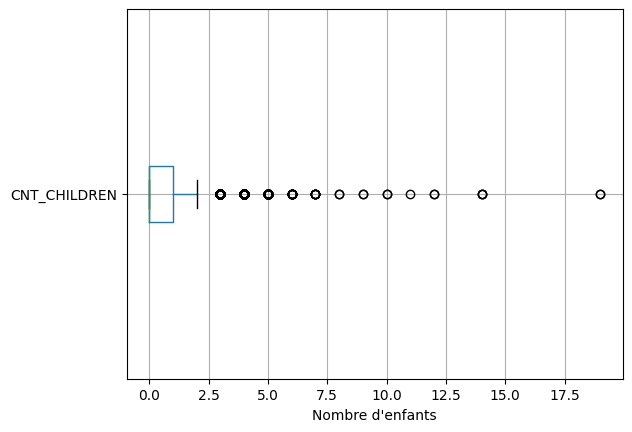

In [17]:
# boîte à moustaches nb enfants
data_encode.boxplot(column="CNT_CHILDREN", vert=False, showfliers=True)
plt.xlabel("Nombre d'enfants")
# plt.yticks([1], [''])
# plt.xlim((-50, 7000))
plt.show()

19 enfants en maximum, possible. Il existe plusieurs personnes dans le monde ayant eu 20 enfants. Et les données viennent de pays d'Asie du Sud principalement.

### Traitement des colonnes avec DAYS_

In [18]:
pd.options.display.float_format = "{:.1f}".format
for col in data_encode.columns:
    if col.startswith("DAYS_"):
        print(col)
        temp_val = (data_encode[col] / -365.25).describe()
        print(temp_val)
        print("------------------------")

DAYS_BIRTH
count   307511.0
mean        43.9
std         11.9
min         20.5
25%         34.0
50%         43.1
75%         53.9
max         69.1
Name: DAYS_BIRTH, dtype: float64
------------------------
DAYS_EMPLOYED
count   307511.0
mean      -174.7
std        386.8
min      -1000.0
25%          0.8
50%          3.3
75%          7.6
max         49.0
Name: DAYS_EMPLOYED, dtype: float64
------------------------
DAYS_REGISTRATION
count   307511.0
mean        13.7
std          9.6
min         -0.0
25%          5.5
50%         12.3
75%         20.5
max         67.5
Name: DAYS_REGISTRATION, dtype: float64
------------------------
DAYS_ID_PUBLISH
count   307511.0
mean         8.2
std          4.1
min         -0.0
25%          4.7
50%          8.9
75%         11.8
max         19.7
Name: DAYS_ID_PUBLISH, dtype: float64
------------------------
DAYS_LAST_PHONE_CHANGE
count   307510.0
mean         2.6
std          2.3
min         -0.0
25%          0.8
50%          2.1
75%          4.3
max     

DAYS_BIRTH : L'âge auquel la personne a contracté le prêt.

In [19]:
(data_encode['DAYS_BIRTH'] / -365.25).describe()

count   307511.0
mean        43.9
std         11.9
min         20.5
25%         34.0
50%         43.1
75%         53.9
max         69.1
Name: DAYS_BIRTH, dtype: float64

DAYS_EMPLOYED : ancienneté dans l'emploi en cours au moment de contracter le prêt.

In [20]:
(data_encode['DAYS_EMPLOYED'] / -365.25).describe()

count   307511.0
mean      -174.7
std        386.8
min      -1000.0
25%          0.8
50%          3.3
75%          7.6
max         49.0
Name: DAYS_EMPLOYED, dtype: float64

In [21]:
data_neg_empl = data_encode.loc[(data_encode["DAYS_EMPLOYED"]/-365.25) < 0, :]
(data_neg_empl['DAYS_EMPLOYED'] / -365.25).describe()

count   55374.0
mean    -1000.0
std         0.0
min     -1000.0
25%     -1000.0
50%     -1000.0
75%     -1000.0
max     -1000.0
Name: DAYS_EMPLOYED, dtype: float64

Ces valeurs à -1000 sont probablement les personnes sans emploi. On cale plutôt la valeur à NaN. Mais on garde l'info dans une nouvelle colonne.

In [22]:
# flag sans emploi
data_encode['FLAG_UNEMPLOYED'] = (data_encode["DAYS_EMPLOYED"]/-365.25) < 0

# remplace valeur abérrantes par NaN
data_encode.loc[data_encode['FLAG_UNEMPLOYED'], 'DAYS_EMPLOYED'] = np.nan

## Correlations

In [23]:
# correlations = data_encode.corr()['TARGET'].sort_values()

In [24]:
# pd.options.display.float_format = "{:.3f}".format
# print('Plus importantes Correlations positives:\n', correlations.tail(10))
# print('Plus importantes Correlations négatives:\n', correlations.head(10))

## Valeurs manquantes

In [25]:
# imputer = impute.SimpleImputer(strategy = 'median')
# imputer.fit(data_encode)
# temp_data = imputer.transform(data_encode)

In [26]:
# data = pd.DataFrame(temp_data)
# data.columns=data_encode.columns
# data.index=data_encode.index

In [27]:
# miss_num = round(data.isnull().mean()*100, 4).sort_values(ascending=False)
# miss_num_df = pd.DataFrame(miss_num, columns = ["%"])
# print(miss_num_df)

# Classification linéaire

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

data_labels = data_encode['TARGET']

# Drop the target from the training data
if 'TARGET' in data_encode:
    data = data_encode.drop(columns = ['TARGET'])
else:
    data = data_encode.copy()
    
# Feature names
features = list(data.columns)

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(data)

# Transform both training and testing data
data = imputer.transform(data)

# Repeat with the scaler
scaler.fit(data)
data = scaler.transform(data)

print('Training data shape: ', data.shape)

Training data shape:  (307511, 243)


In [29]:
X = data
y = data_labels

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # 30% des données dans le jeu de test

### DummyModel

In [31]:
dummyModel = dummy.DummyClassifier(strategy="stratified")
dummyModel.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [32]:
y_pred_train_dummy = dummyModel.predict(X_train)
y_pred_test_dummy = dummyModel.predict(X_test)

Accuracy :
TrainingSet : 85.16 %
TestingSet : 85.11 %
---------------------------------------
Rappel (Recall/Sensitivity) :
TrainingSet : 7.96 %
TestingSet : 7.88 %
---------------------------------------
Précision :
TrainingSet : 7.98 %
TestingSet : 7.87 %
---------------------------------------
AUC :
TrainingSet : 0.499
TestingSet : 0.499
---------------------------------------
F1-score :
TrainingSet : 7.97 %
TestingSet : 7.88 %
---------------------------------------


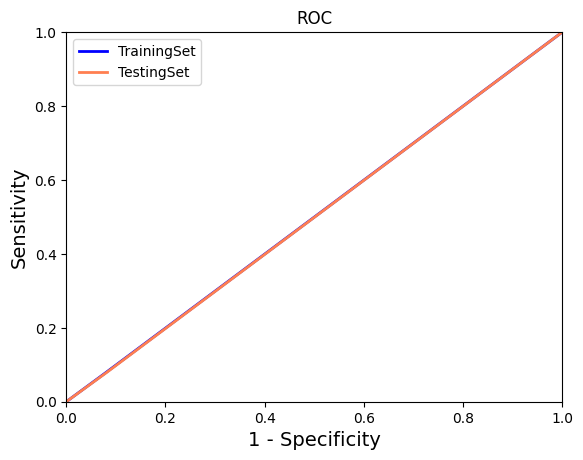

In [33]:
classification_metrics(dummyModel, X_train, X_test, y_train, y_test, y_pred_train_dummy, y_pred_test_dummy, all_metrics=True, roc_curve=True)

### Logistic Regression

In [34]:
logRegModel = linear_model.LogisticRegression(C = 0.0001)
logRegModel.fit(X_train, y_train)

LogisticRegression(C=0.0001)

In [35]:
y_pred_train_logreg = logRegModel.predict(X_train)
y_pred_test_logreg = logRegModel.predict(X_test)

Accuracy :
TrainingSet : 91.93 %
TestingSet : 91.93 %
---------------------------------------
Rappel (Recall/Sensitivity) :
TrainingSet : 0.0 %
TestingSet : 0.0 %
---------------------------------------
Précision :
TrainingSet : 0.0 %
TestingSet : 0.0 %
---------------------------------------
AUC :
TrainingSet : 0.5
TestingSet : 0.5
---------------------------------------
F1-score :
TrainingSet : 0.0 %
TestingSet : 0.0 %
---------------------------------------


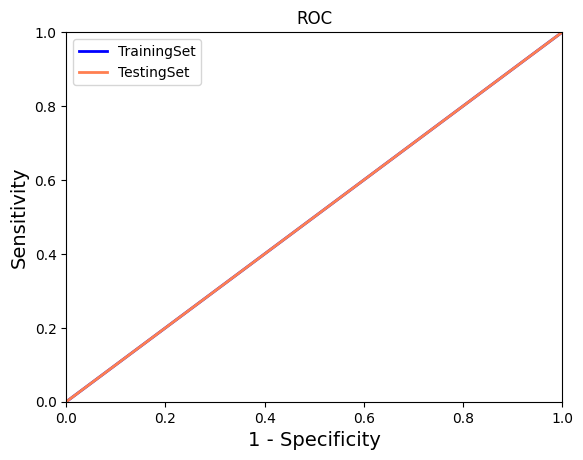

In [36]:
classification_metrics(logRegModel, X_train, X_test, y_train, y_test, y_pred_train_logreg, y_pred_test_logreg, all_metrics=True, roc_curve=True)

### KNN

In [52]:
knnModel = neighbors.KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred_train_knn = knnModel.predict(X_train)
y_pred_test_knn = knnModel.predict(X_test)

Accuracy :
TrainingSet : 92.89 %
TestingSet : 90.31 %
---------------------------------------
Rappel (Recall/Sensitivity) :
TrainingSet : 19.92 %
TestingSet : 3.84 %
---------------------------------------
Précision :
TrainingSet : 71.42 %
TestingSet : 13.83 %
---------------------------------------
AUC :
TrainingSet : 0.596
TestingSet : 0.509
---------------------------------------
F1-score :
TrainingSet : 31.15 %
TestingSet : 6.01 %
---------------------------------------


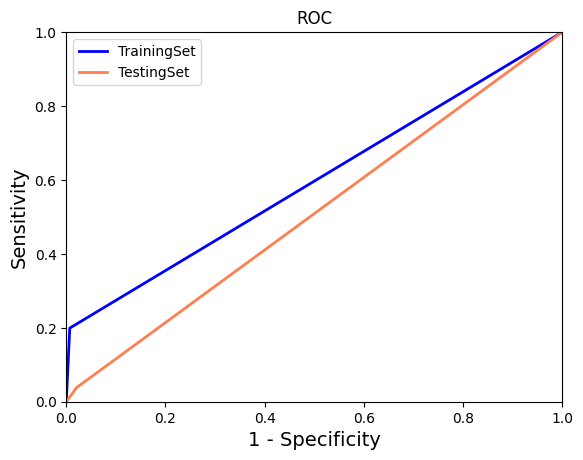

In [54]:
classification_metrics(knnModel, X_train, X_test, y_train, y_test, y_pred_train_knn, y_pred_test_knn, all_metrics=True, roc_curve=True)

### SVM

In [40]:
# svmModel = svm.SVC()
# svmModel.fit(X_train, y_train)

In [41]:
# y_pred_train_svm = svmModel.predict(X_train)
# y_pred_test_svm = svmModel.predict(X_test)

In [42]:
# classification_metrics(svmModel, X_train, X_test, y_train, y_test, y_pred_train_svm, y_pred_test_svm, all_metrics=True, roc_curve=True)

### RFC

In [43]:
rfcModel = ensemble.RandomForestClassifier()

In [44]:
rfcModel.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
features = [x for x in list(data_encode.columns) if x != 'TARGET']
feature_importance_values = rfcModel.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [46]:
pd.options.display.float_format = "{:.3f}".format
feature_importances.sort_values("importance", ascending=False)[:10]

,feature,importance
32,EXT_SOURCE_2,0.049
33,EXT_SOURCE_3,0.046
10,DAYS_BIRTH,0.032
13,DAYS_ID_PUBLISH,0.031
12,DAYS_REGISTRATION,0.031
0,SK_ID_CURR,0.030
11,DAYS_EMPLOYED,0.029
7,AMT_ANNUITY,0.029
81,DAYS_LAST_PHONE_CHANGE,0.028
6,AMT_CREDIT,0.027


In [47]:
y_pred_train_rfc = rfcModel.predict(X_train)
y_pred_test_rfc = rfcModel.predict(X_test)

Accuracy :
TrainingSet : 100.0 %
TestingSet : 91.93 %
---------------------------------------
Rappel (Recall/Sensitivity) :
TrainingSet : 99.97 %
TestingSet : 0.11 %
---------------------------------------
Précision :
TrainingSet : 100.0 %
TestingSet : 80.0 %
---------------------------------------
AUC :
TrainingSet : 1.0
TestingSet : 0.501
---------------------------------------
F1-score :
TrainingSet : 99.98 %
TestingSet : 0.21 %
---------------------------------------


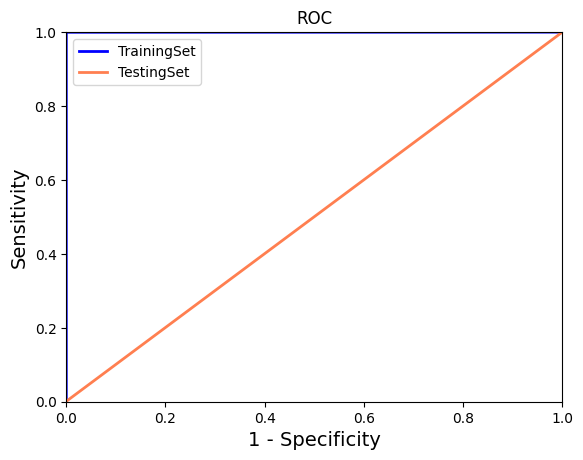

In [48]:
classification_metrics(rfcModel, X_train, X_test, y_train, y_test, y_pred_train_rfc, y_pred_test_rfc, all_metrics=True, roc_curve=True)

### XGBoost

In [49]:
xgBoostModel = ensemble.GradientBoostingClassifier()
xgBoostModel.fit(X_train, y_train)

GradientBoostingClassifier()

In [50]:
y_pred_train_xgb = xgBoostModel.predict(X_train)
y_pred_test_xgb = xgBoostModel.predict(X_test)

Accuracy :
TrainingSet : 91.99 %
TestingSet : 91.96 %
---------------------------------------
Rappel (Recall/Sensitivity) :
TrainingSet : 1.43 %
TestingSet : 1.26 %
---------------------------------------
Précision :
TrainingSet : 68.32 %
TestingSet : 60.26 %
---------------------------------------
AUC :
TrainingSet : 0.507
TestingSet : 0.506
---------------------------------------
F1-score :
TrainingSet : 2.8 %
TestingSet : 2.47 %
---------------------------------------


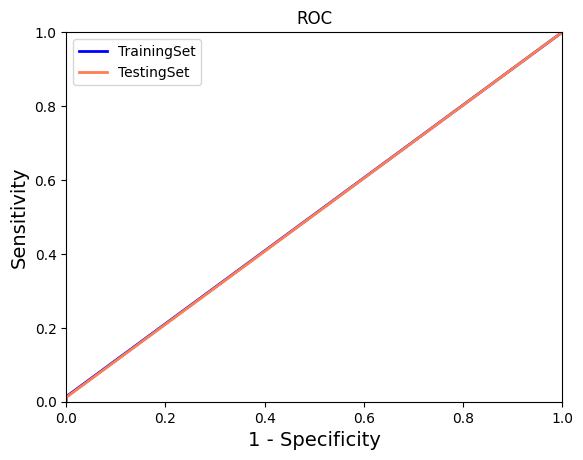

In [51]:
classification_metrics(xgBoostModel, X_train, X_test, y_train, y_test, y_pred_train_xgb, y_pred_test_xgb, all_metrics=True, roc_curve=True)

In [1]:
# pour afficher le report classifier
# from yellowbrick.classifier import ClassificationReport
# visualizer = ClassificationReport(dummyModel, classes=target_labels, support=True)
# visualizer.fit(X_train_std, y_train)  # Fit the visualizer and the model
# visualizer.score(X_test_std, y_test)  # Evaluate the model on the test data
# visualizer.show()             #